In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Collecting Data

In [14]:
data = pd.read_csv(r'Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Data Pre-Processing

In [15]:
data.drop(columns=['Id','Species'], inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [17]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


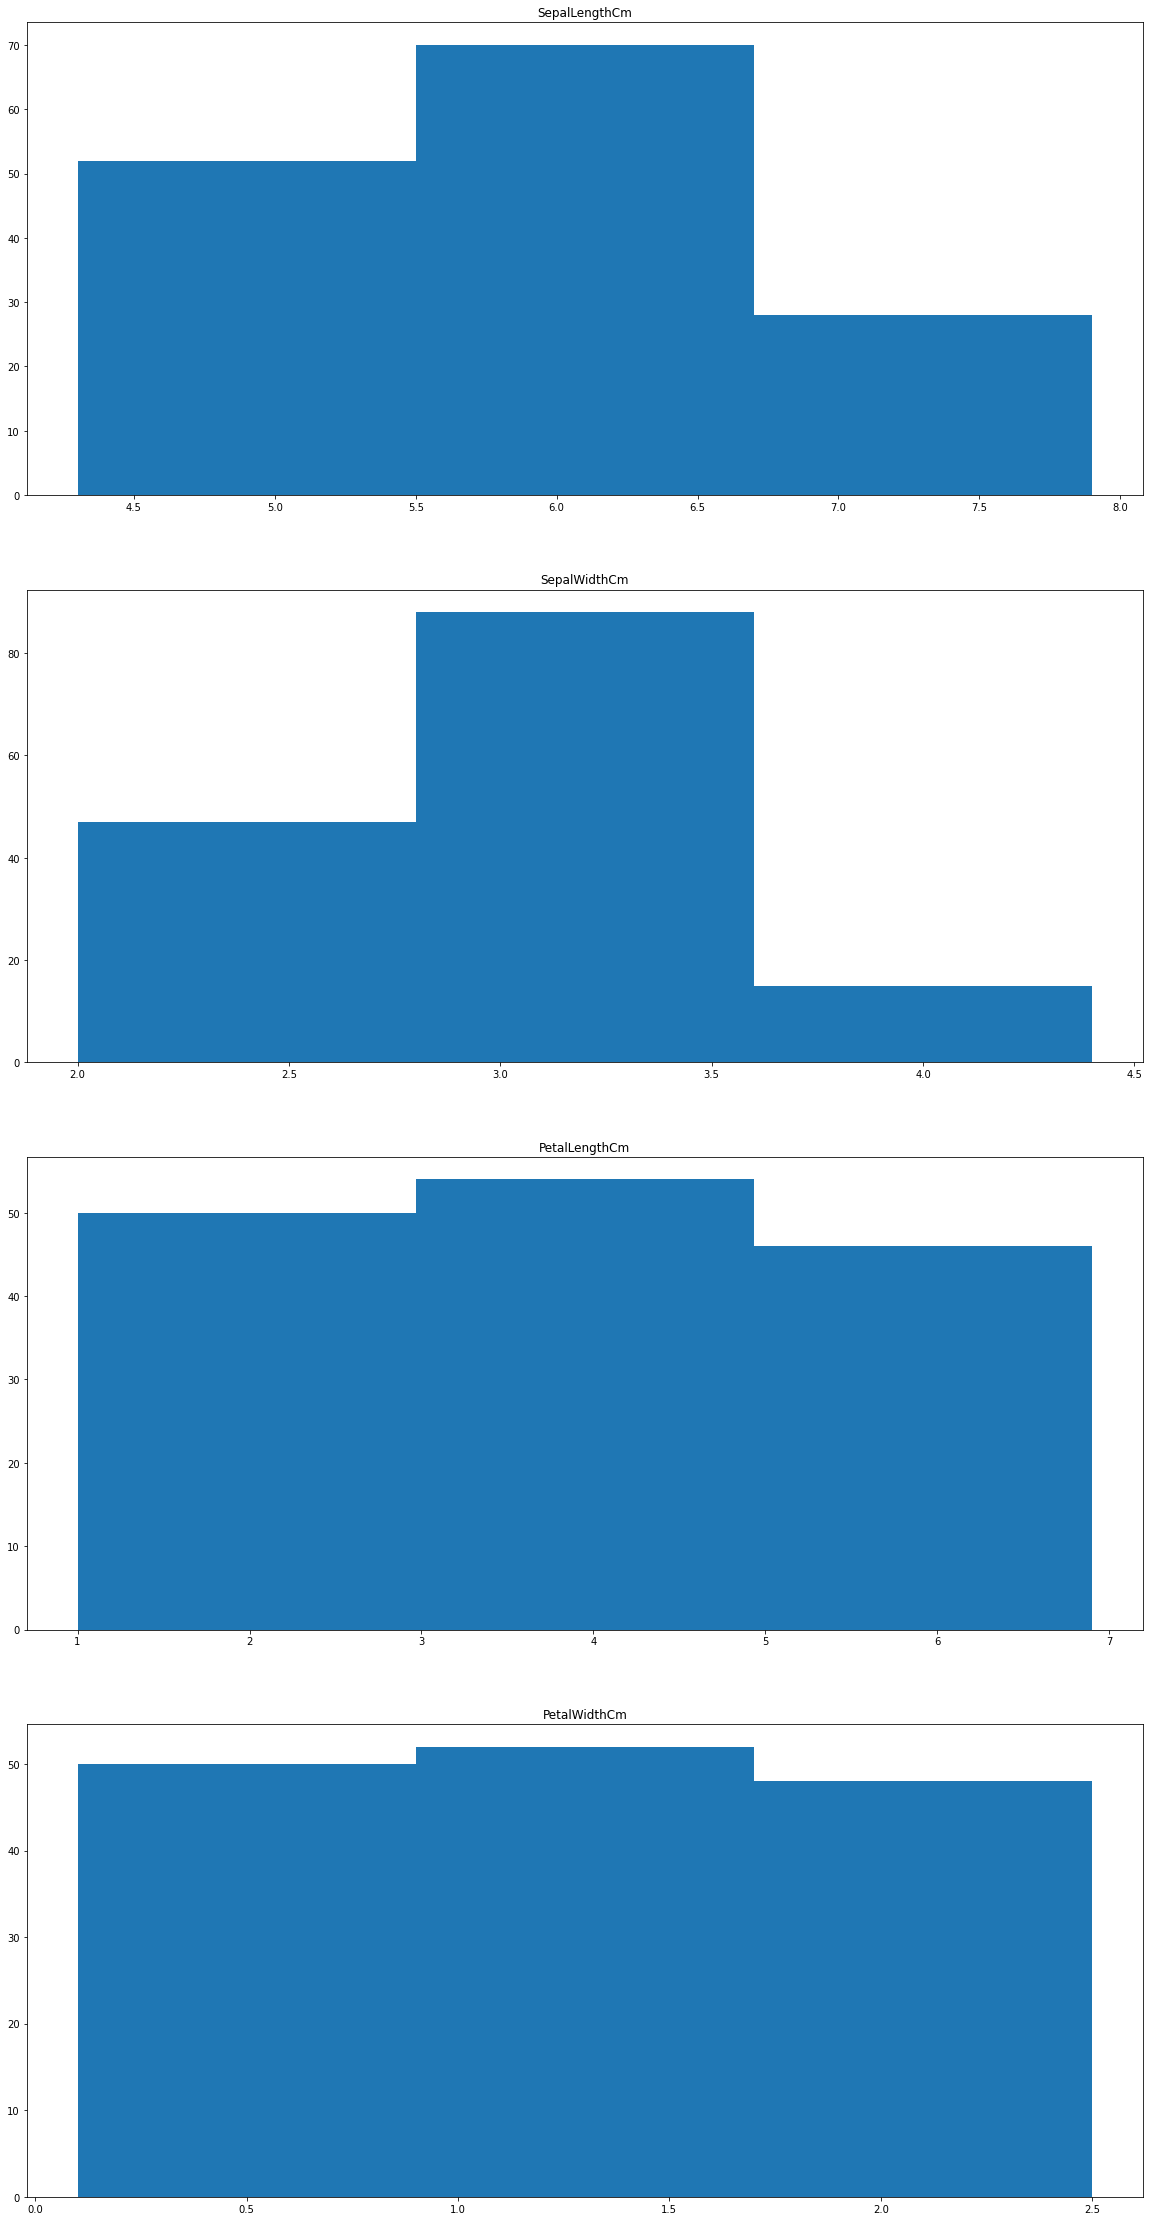

In [20]:
fig, axes = plt.subplots(4,1, figsize=(20,40))
for col, axis in zip(data.columns, axes):
    axis.hist(data[[col]], bins=3)
    axis.set_title(f'{col}')

# Data Scaling

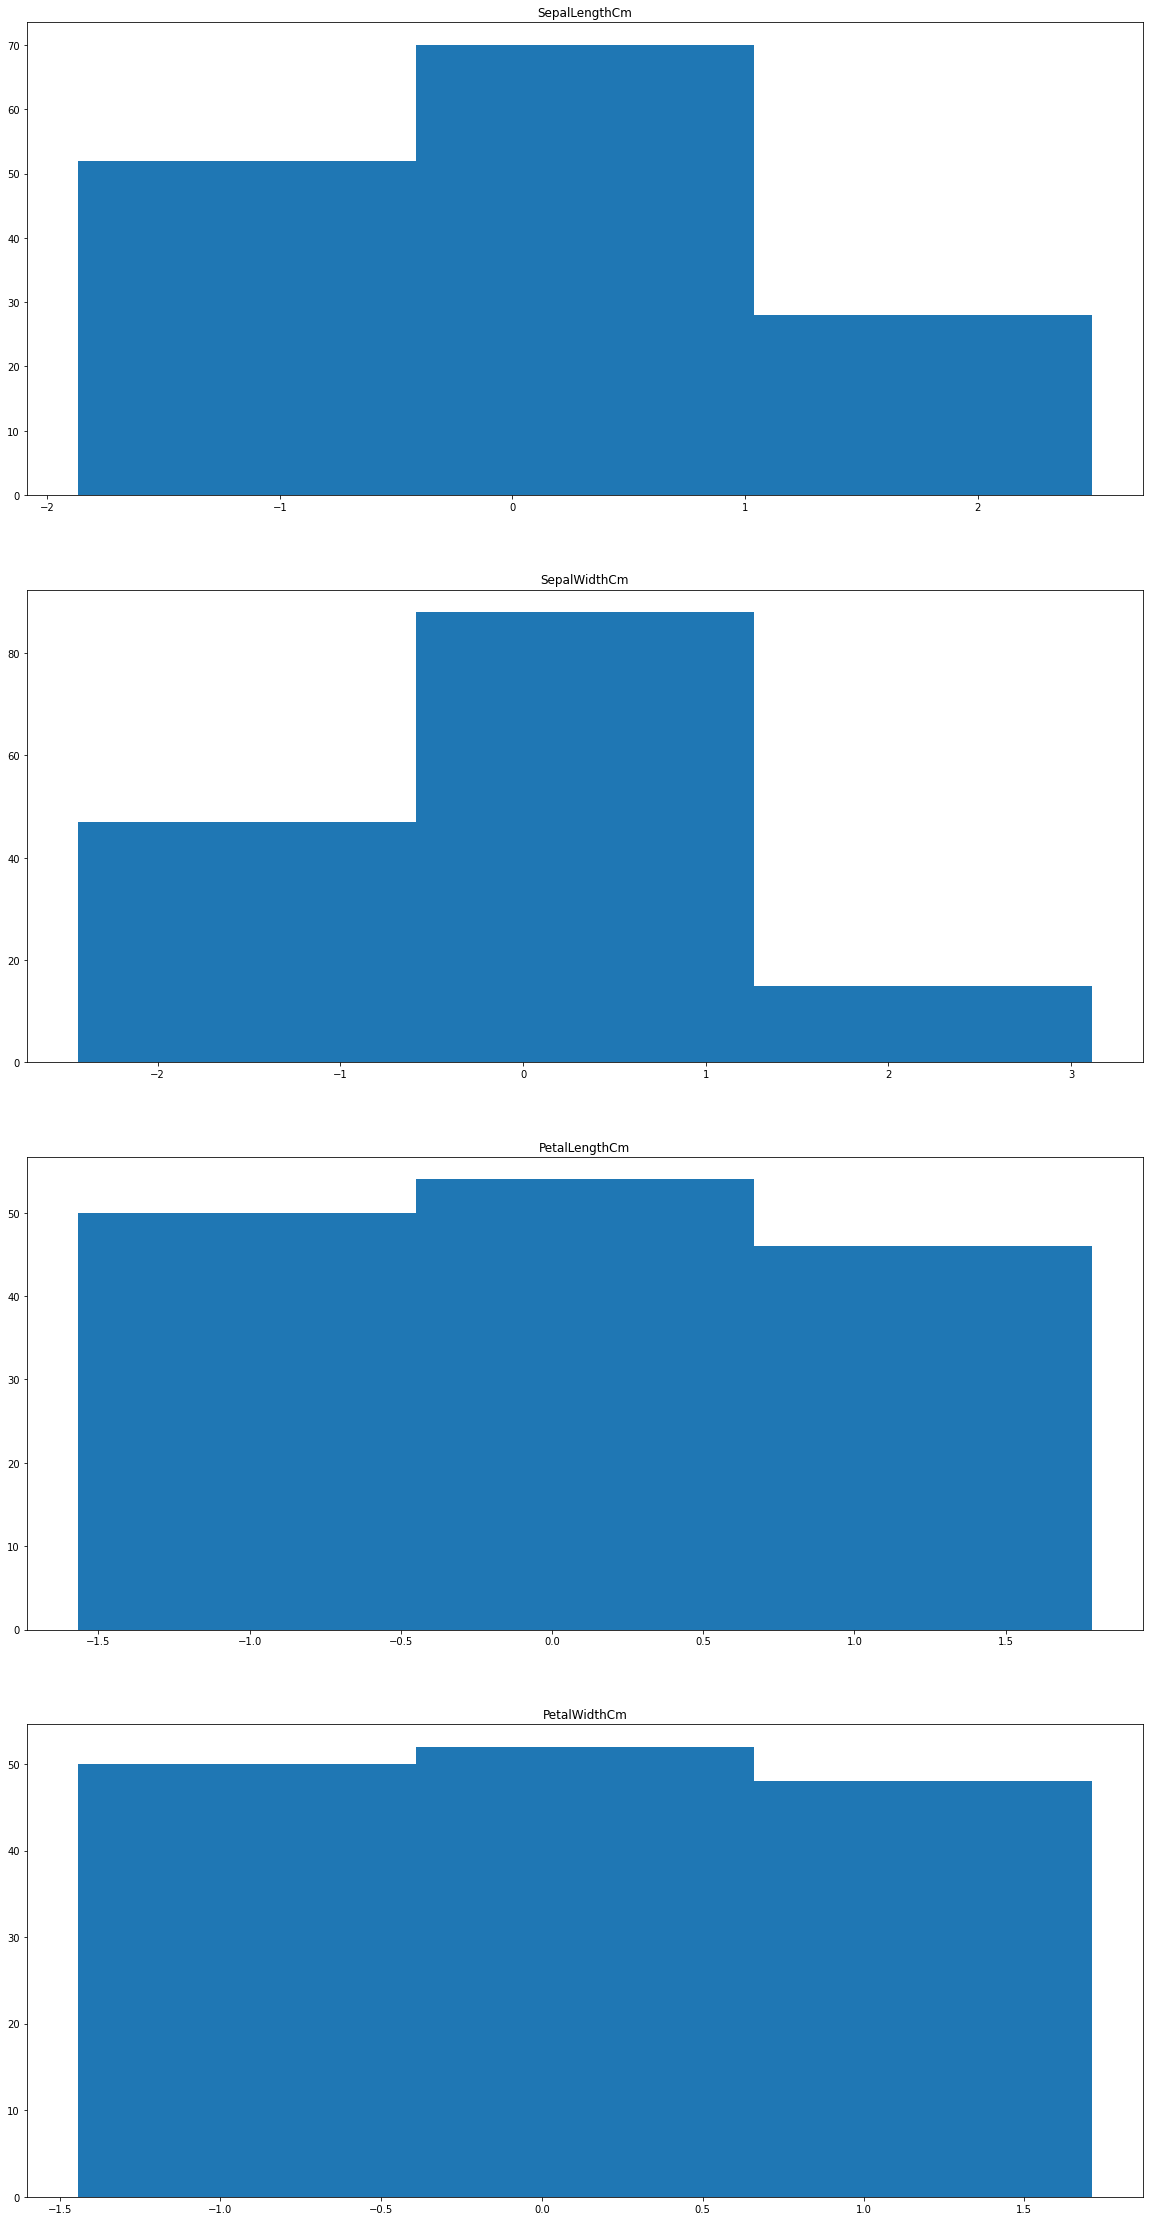

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaledX = scaler.fit_transform(data)

fig1, axes1 = plt.subplots(4,1, figsize=(20,40))
for index, col, axis in zip(range(4), data.columns,axes1):
    axis.hist(scaledX[:, index], bins=3)
    axis.set_title(f'{col}')

In [23]:
scaledX[:, 0].mean()

-4.736951571734001e-16

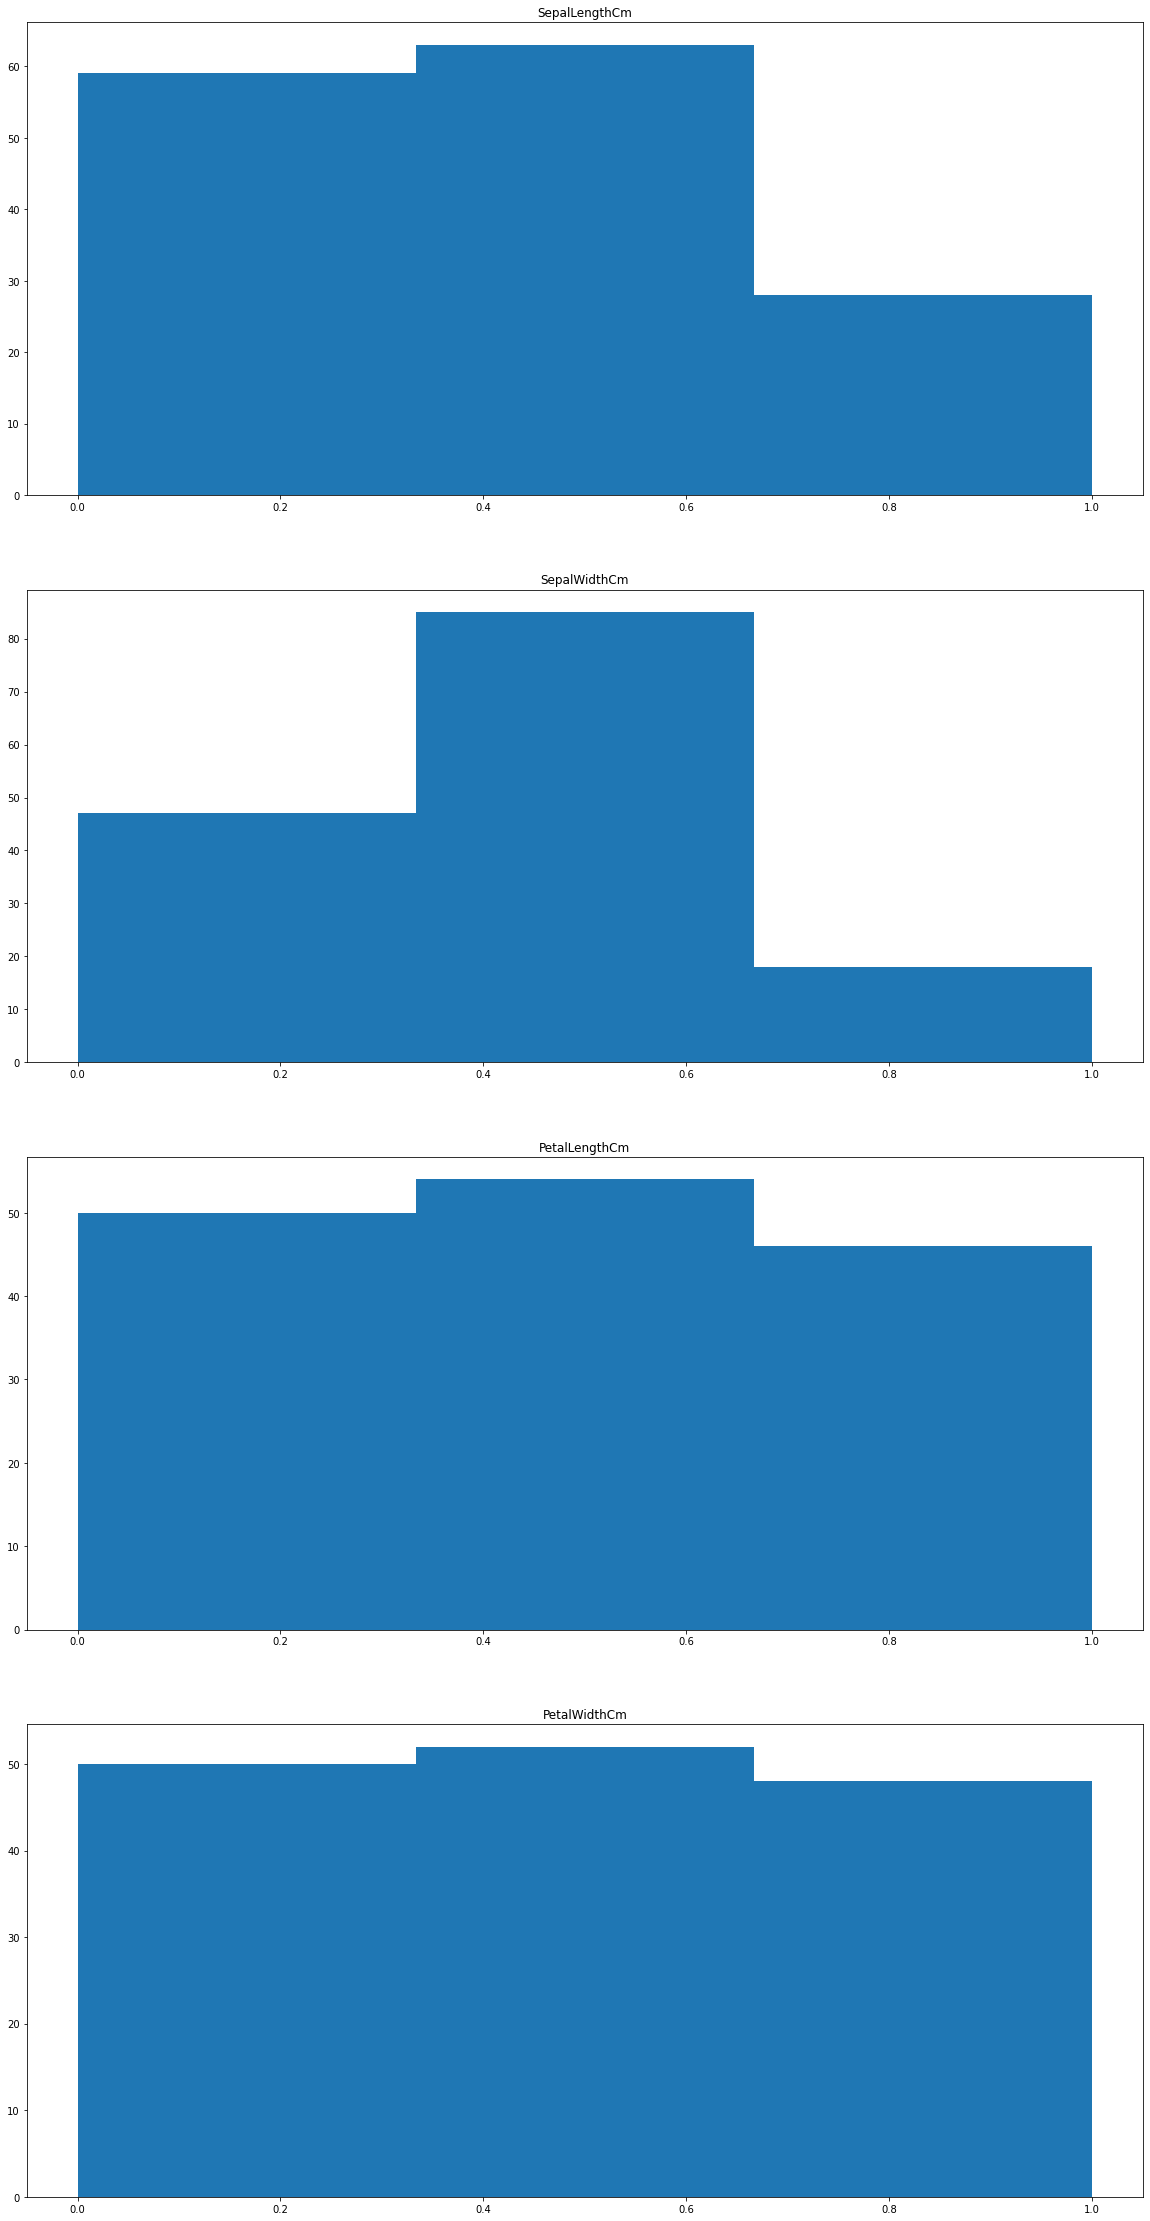

In [29]:
mscaler = MinMaxScaler()
mscaledX = mscaler.fit_transform(data)

fig2, axes2 = plt.subplots(4,1, figsize=(20,40))
for index, col, axis in zip(range(4), data.columns,axes2):
    axis.hist(mscaledX[:, index], bins=3)
    axis.set_title(f'{col}')

In [30]:
mscaledX[:, 0].mean()

0.42870370370370364

# Split Data

In [31]:
from sklearn.model_selection import train_test_split

xtrain, xtest = train_test_split(scaledX, test_size=0.2, random_state=1)
xtrain.shape, xtest.shape

((120, 4), (30, 4))

# Modeling

In [33]:
from sklearn.cluster import KMeans

model = KMeans()

model.fit(xtrain[:, 2:4])
model.labels_, model.inertia_

(array([0, 2, 6, 2, 2, 1, 3, 1, 0, 7, 2, 1, 0, 7, 0, 5, 1, 1, 1, 3, 1, 1,
        5, 2, 7, 2, 4, 0, 5, 3, 1, 4, 4, 1, 1, 2, 1, 4, 4, 3, 3, 2, 4, 1,
        6, 3, 7, 6, 2, 3, 1, 1, 1, 2, 1, 0, 4, 4, 1, 1, 6, 1, 7, 3, 5, 2,
        3, 2, 2, 3, 1, 3, 1, 6, 0, 1, 0, 1, 1, 2, 4, 2, 1, 1, 4, 1, 4, 1,
        4, 0, 1, 2, 1, 3, 1, 6, 6, 1, 1, 6, 1, 3, 0, 1, 0, 3, 0, 0, 4, 1,
        1, 7, 3, 7, 6, 0, 7, 0, 2, 1]),
 4.056039883069654)

Text(0, 0.5, 'Petal width')

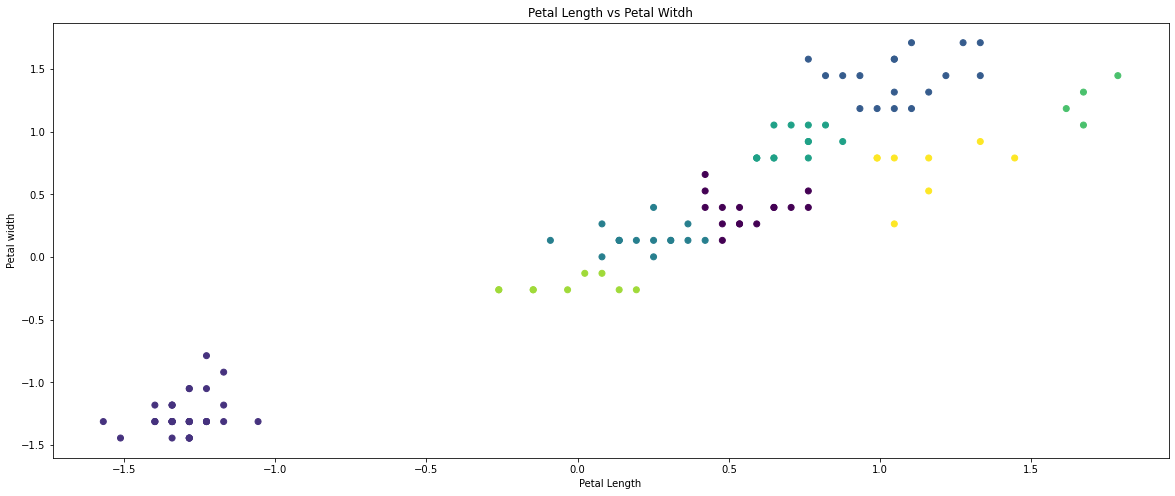

In [35]:
fig3, axes3 = plt.subplots(1,1, figsize=(20,8))
axes3.scatter(xtrain[:, 2], xtrain[:, 3], c=model.labels_)
axes3.set_title("Petal Length vs Petal Witdh")
axes3.set_xlabel("Petal Length")
axes3.set_ylabel("Petal width")

Inetia For 2 => 45.29401317112144
Inetia For 3 => 15.199046875735066
Inetia For 4 => 9.860934239060079
Inetia For 5 => 7.395570455874252
Inetia For 6 => 5.733818018635131
Inetia For 7 => 4.789252618640994
Inetia For 8 => 4.044574960172343
Inetia For 9 => 3.5196727704435733
Inetia For 10 => 2.9938547508585116
Inetia For 11 => 2.762774886282718
Inetia For 12 => 2.5215178298272
Inetia For 13 => 2.297340972001874
Inetia For 14 => 1.9956981468727755


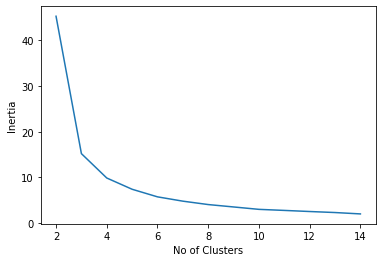

In [37]:
inertia = []
for k in range(2,15):
    Model = KMeans(n_clusters=k)
    Model.fit(xtrain[:, 2:4])
    print(f'Inetia For {k} => {Model.inertia_}')
    inertia.append(Model.inertia_)

plt.plot(list(range(2,15)), inertia)
plt.xlabel('No of Clusters')
plt.ylabel('Inertia')
plt.show()

# Final Model

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2]


Text(0, 0.5, 'PetalWidth')

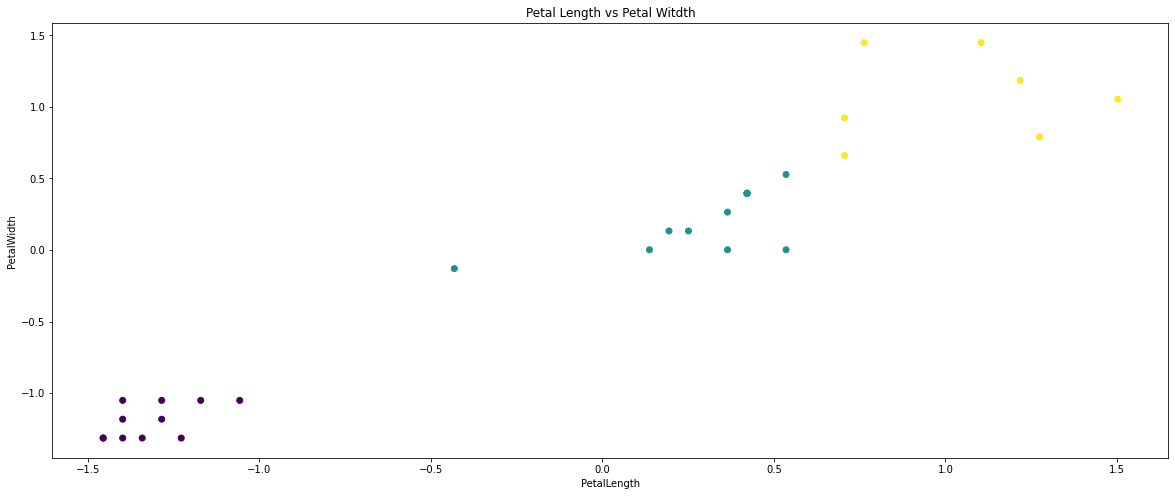

In [38]:
fmodel = KMeans(n_clusters=3)
fmodel.fit(xtrain[:, 2:4])
ypred = fmodel.predict(xtest[:, 2:4])
print(ypred)
fig4, axes4 = plt.subplots(1,1, figsize=(20,8))
axes4.scatter(xtest[:, 2], xtest[:, 3], c=ypred)
axes4.set_title('Petal Length vs Petal Witdth')
axes4.set_xlabel('PetalLength')
axes4.set_ylabel('PetalWidth')